# PART 4-2 < Cluster 기반 Mapping : 교향곡 >

# Import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
data_solo = pd.read_csv('data/concert_교향곡_code3.csv')

# 분포 시각화 및 Mapping 을 위한 테이블 분할 

In [3]:
# little preprocessing 

data_solo = data_solo.iloc[:,1:]
data_solo['열'] = data_solo['열'].str.replace('열', '')
data_solo = data_solo[~data_solo['열'].isin(['box'])]
data_solo['열'] = data_solo['열'].fillna(0)
data_solo['열'] = data_solo['열'].astype('int')

In [4]:
# 박스 별 구분 

solo_C = data_solo[data_solo['블록(박스)'] == 'C']
solo_B = data_solo[data_solo['블록(박스)'] == 'B']
solo_D = data_solo[data_solo['블록(박스)'] == 'D']
solo_A = data_solo[data_solo['블록(박스)'] == 'A']
solo_E = data_solo[data_solo['블록(박스)'] == 'E']
solo_G = data_solo[data_solo['블록(박스)'] == 'G']
solo_M = data_solo[data_solo['블록(박스)'] == 'M']
solo_F = data_solo[data_solo['블록(박스)'] == 'F']
solo_N = data_solo[data_solo['블록(박스)'] == 'N']

In [5]:
# 해당 박스의 층별 구분 
solo_C_f1 = solo_C[solo_C['층'] == 1]
solo_C_f2 = solo_C[solo_C['층'] == 2]
solo_C_f3 = solo_C[solo_C['층'] == 3]

solo_B_f1 = solo_B[solo_B['층'] == 1]
solo_B_f2 = solo_B[solo_B['층'] == 2]
solo_B_f3 = solo_B[solo_B['층'] == 3]

solo_D_f1 = solo_D[solo_D['층'] == 1]
solo_D_f2 = solo_D[solo_D['층'] == 2]
solo_D_f3 = solo_D[solo_D['층'] == 3]

solo_A_f1 = solo_A[solo_A['층'] == 1]
solo_A_f2 = solo_A[solo_A['층'] == 2]
solo_A_f3 = solo_A[solo_A['층'] == 3]

solo_E_f1 = solo_E[solo_E['층'] == 1]
solo_E_f2 = solo_E[solo_E['층'] == 2]
solo_E_f3 = solo_E[solo_E['층'] == 3]

solo_G_f1 = solo_G[solo_G['층'] == 1]
solo_G_f2 = solo_G[solo_G['층'] == 2]
solo_G_f3 = solo_G[solo_G['층'] == 3]

solo_M_f1 = solo_M[solo_M['층'] == 1]
solo_M_f2 = solo_M[solo_M['층'] == 2]
solo_M_f3 = solo_M[solo_M['층'] == 3]

solo_F_f1 = solo_F[solo_F['층'] == 1]
solo_F_f2 = solo_F[solo_F['층'] == 2]
solo_F_f3 = solo_F[solo_F['층'] == 3]

solo_N_f1 = solo_N[solo_N['층'] == 1]
solo_N_f2 = solo_N[solo_N['층'] == 2]
solo_N_f3 = solo_N[solo_N['층'] == 3]

# 분포 시각화

**나누어진 테이블 기반 시각화**

- 클러스터별 '열' 선호도 시각화

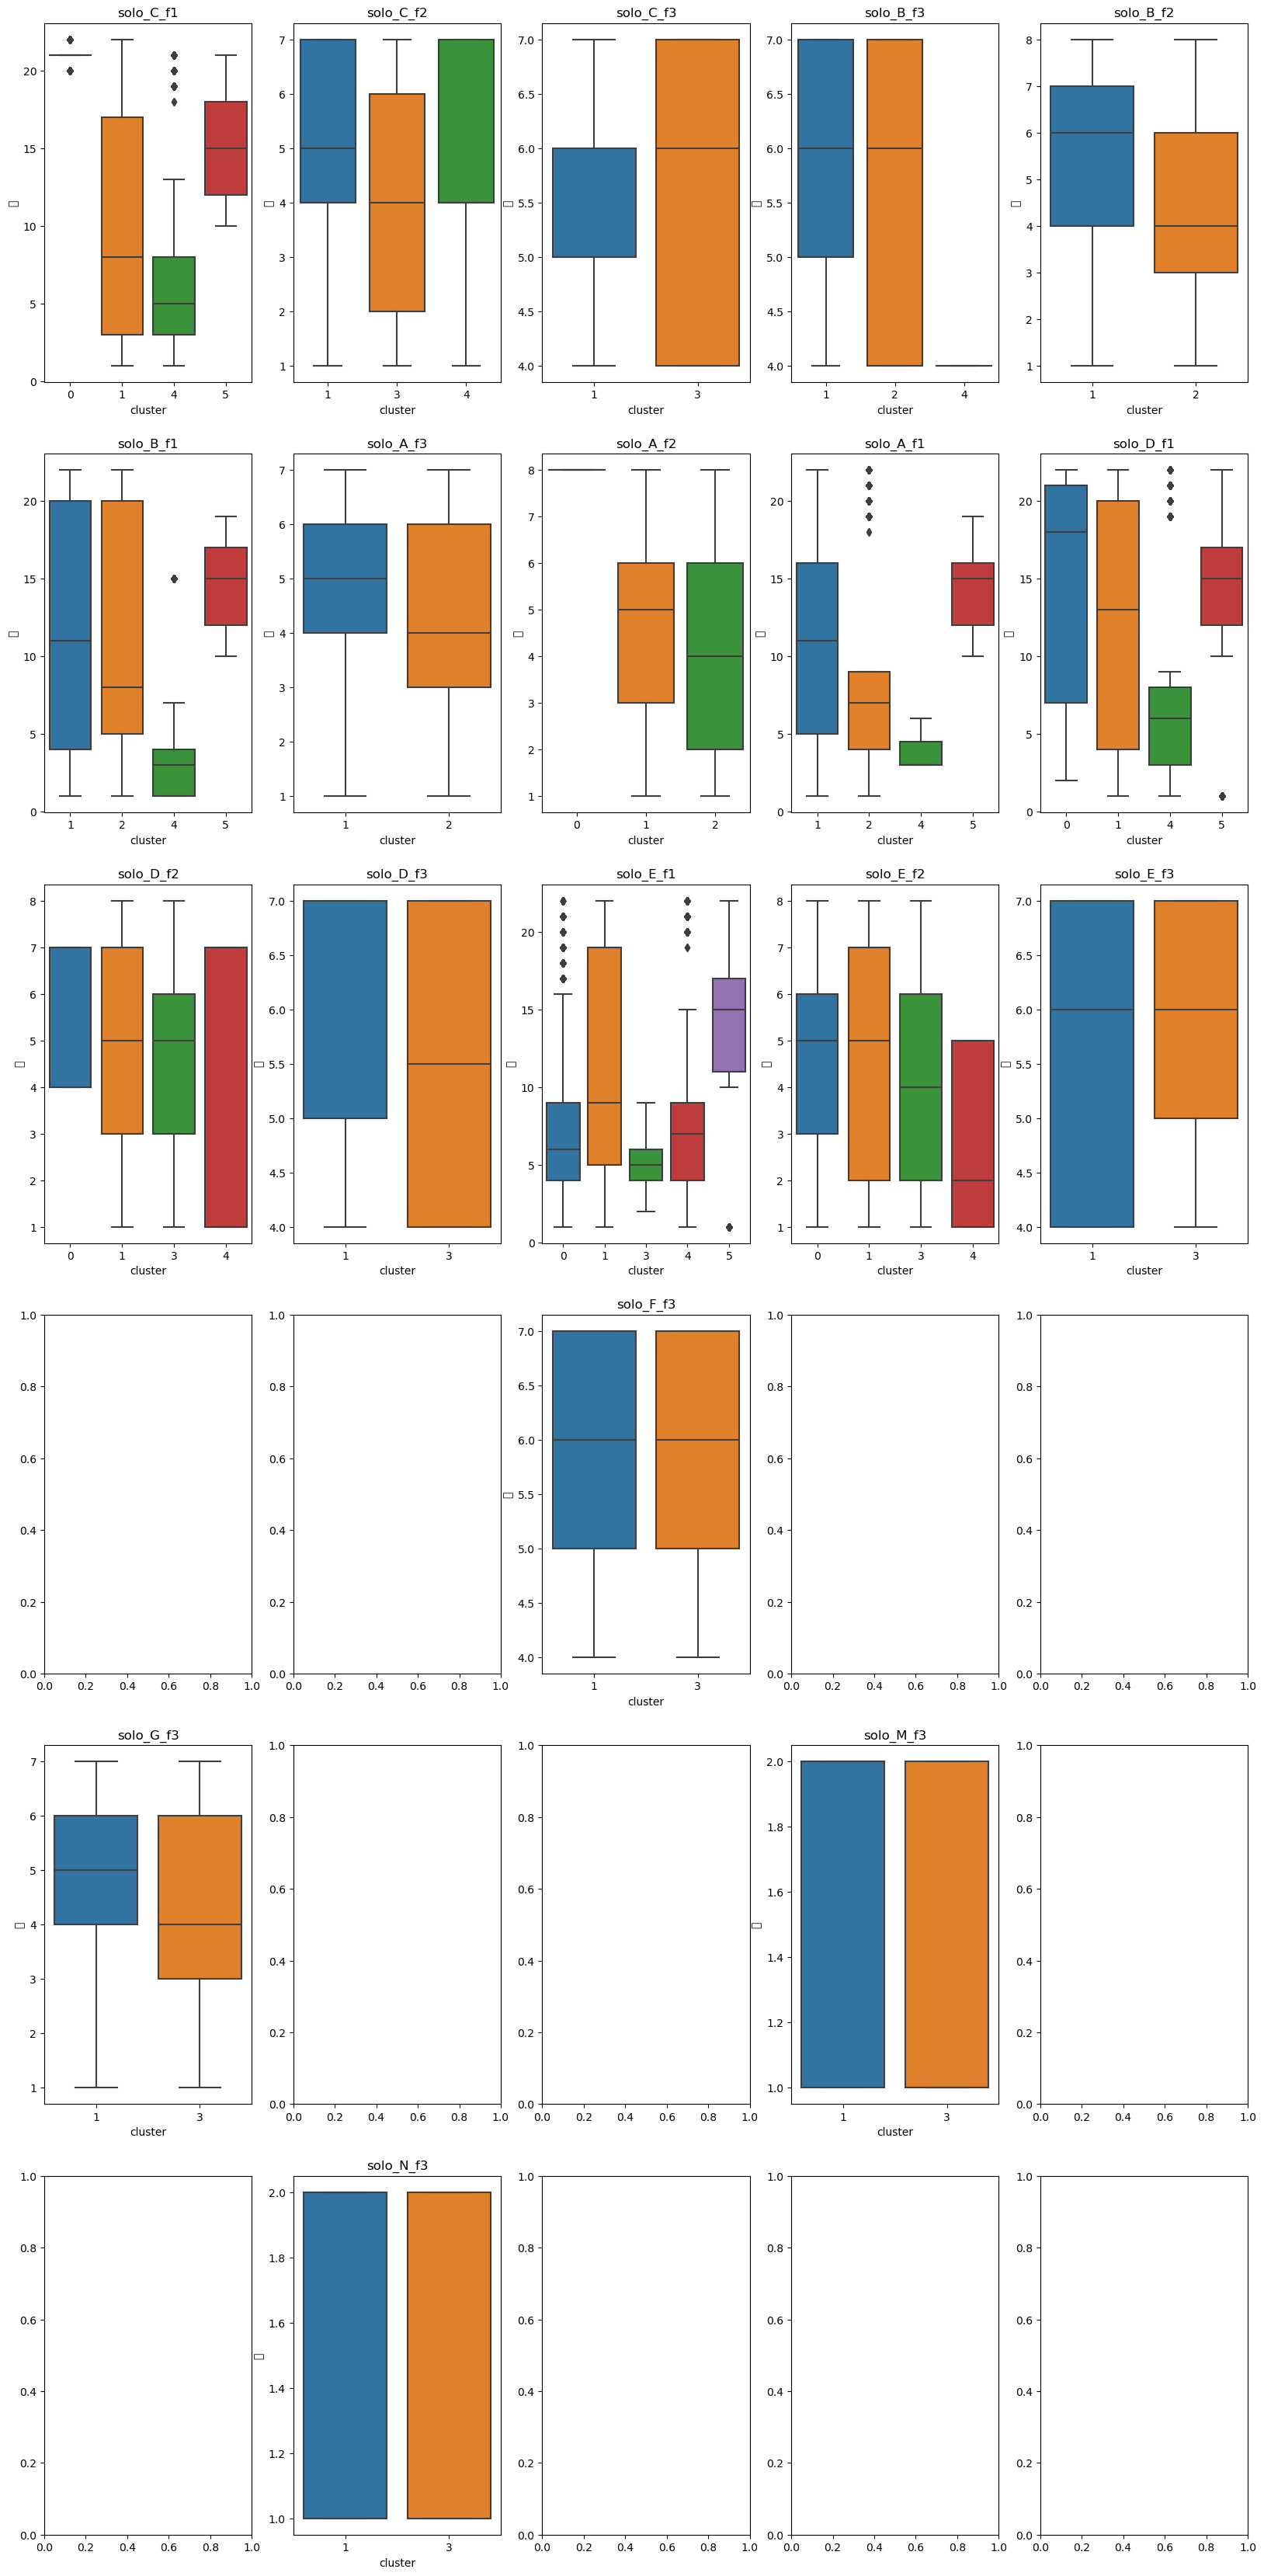

In [6]:
# visualizing 
datas = [solo_C_f1,solo_C_f2,solo_C_f3,solo_B_f3,solo_B_f2,solo_B_f1,solo_A_f3,solo_A_f2,solo_A_f1,solo_D_f1,solo_D_f2,solo_D_f3,
         solo_E_f1,solo_E_f2,solo_E_f3,solo_F_f1,solo_F_f2,solo_F_f3,solo_G_f1,solo_G_f2,solo_G_f3,solo_M_f1,solo_M_f2,solo_M_f3,
         solo_N_f1,solo_N_f2,solo_N_f3]
datas_title = ['solo_C_f1','solo_C_f2','solo_C_f3','solo_B_f3','solo_B_f2','solo_B_f1','solo_A_f3','solo_A_f2','solo_A_f1','solo_D_f1','solo_D_f2','solo_D_f3',
         'solo_E_f1','solo_E_f2','solo_E_f3','solo_F_f1','solo_F_f2','solo_F_f3','solo_G_f1','solo_G_f2','solo_G_f3','solo_M_f1','solo_M_f2','solo_M_f3',
         'solo_N_f1','solo_N_f2','solo_N_f3']

col_n = 5
row_n = 6

fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(20,row_n*7))

n = 0
for i in  range(len(datas)):
    if len(datas[i]) != 0:
        p = sns.boxplot(y='열',x='cluster',data=datas[i], ax=ax[int(n/col_n),int(n%col_n)])
        p.set_title(datas_title[i])
    n+=1

- 클러스터별 '행'(자리번호) 선호도 시각화

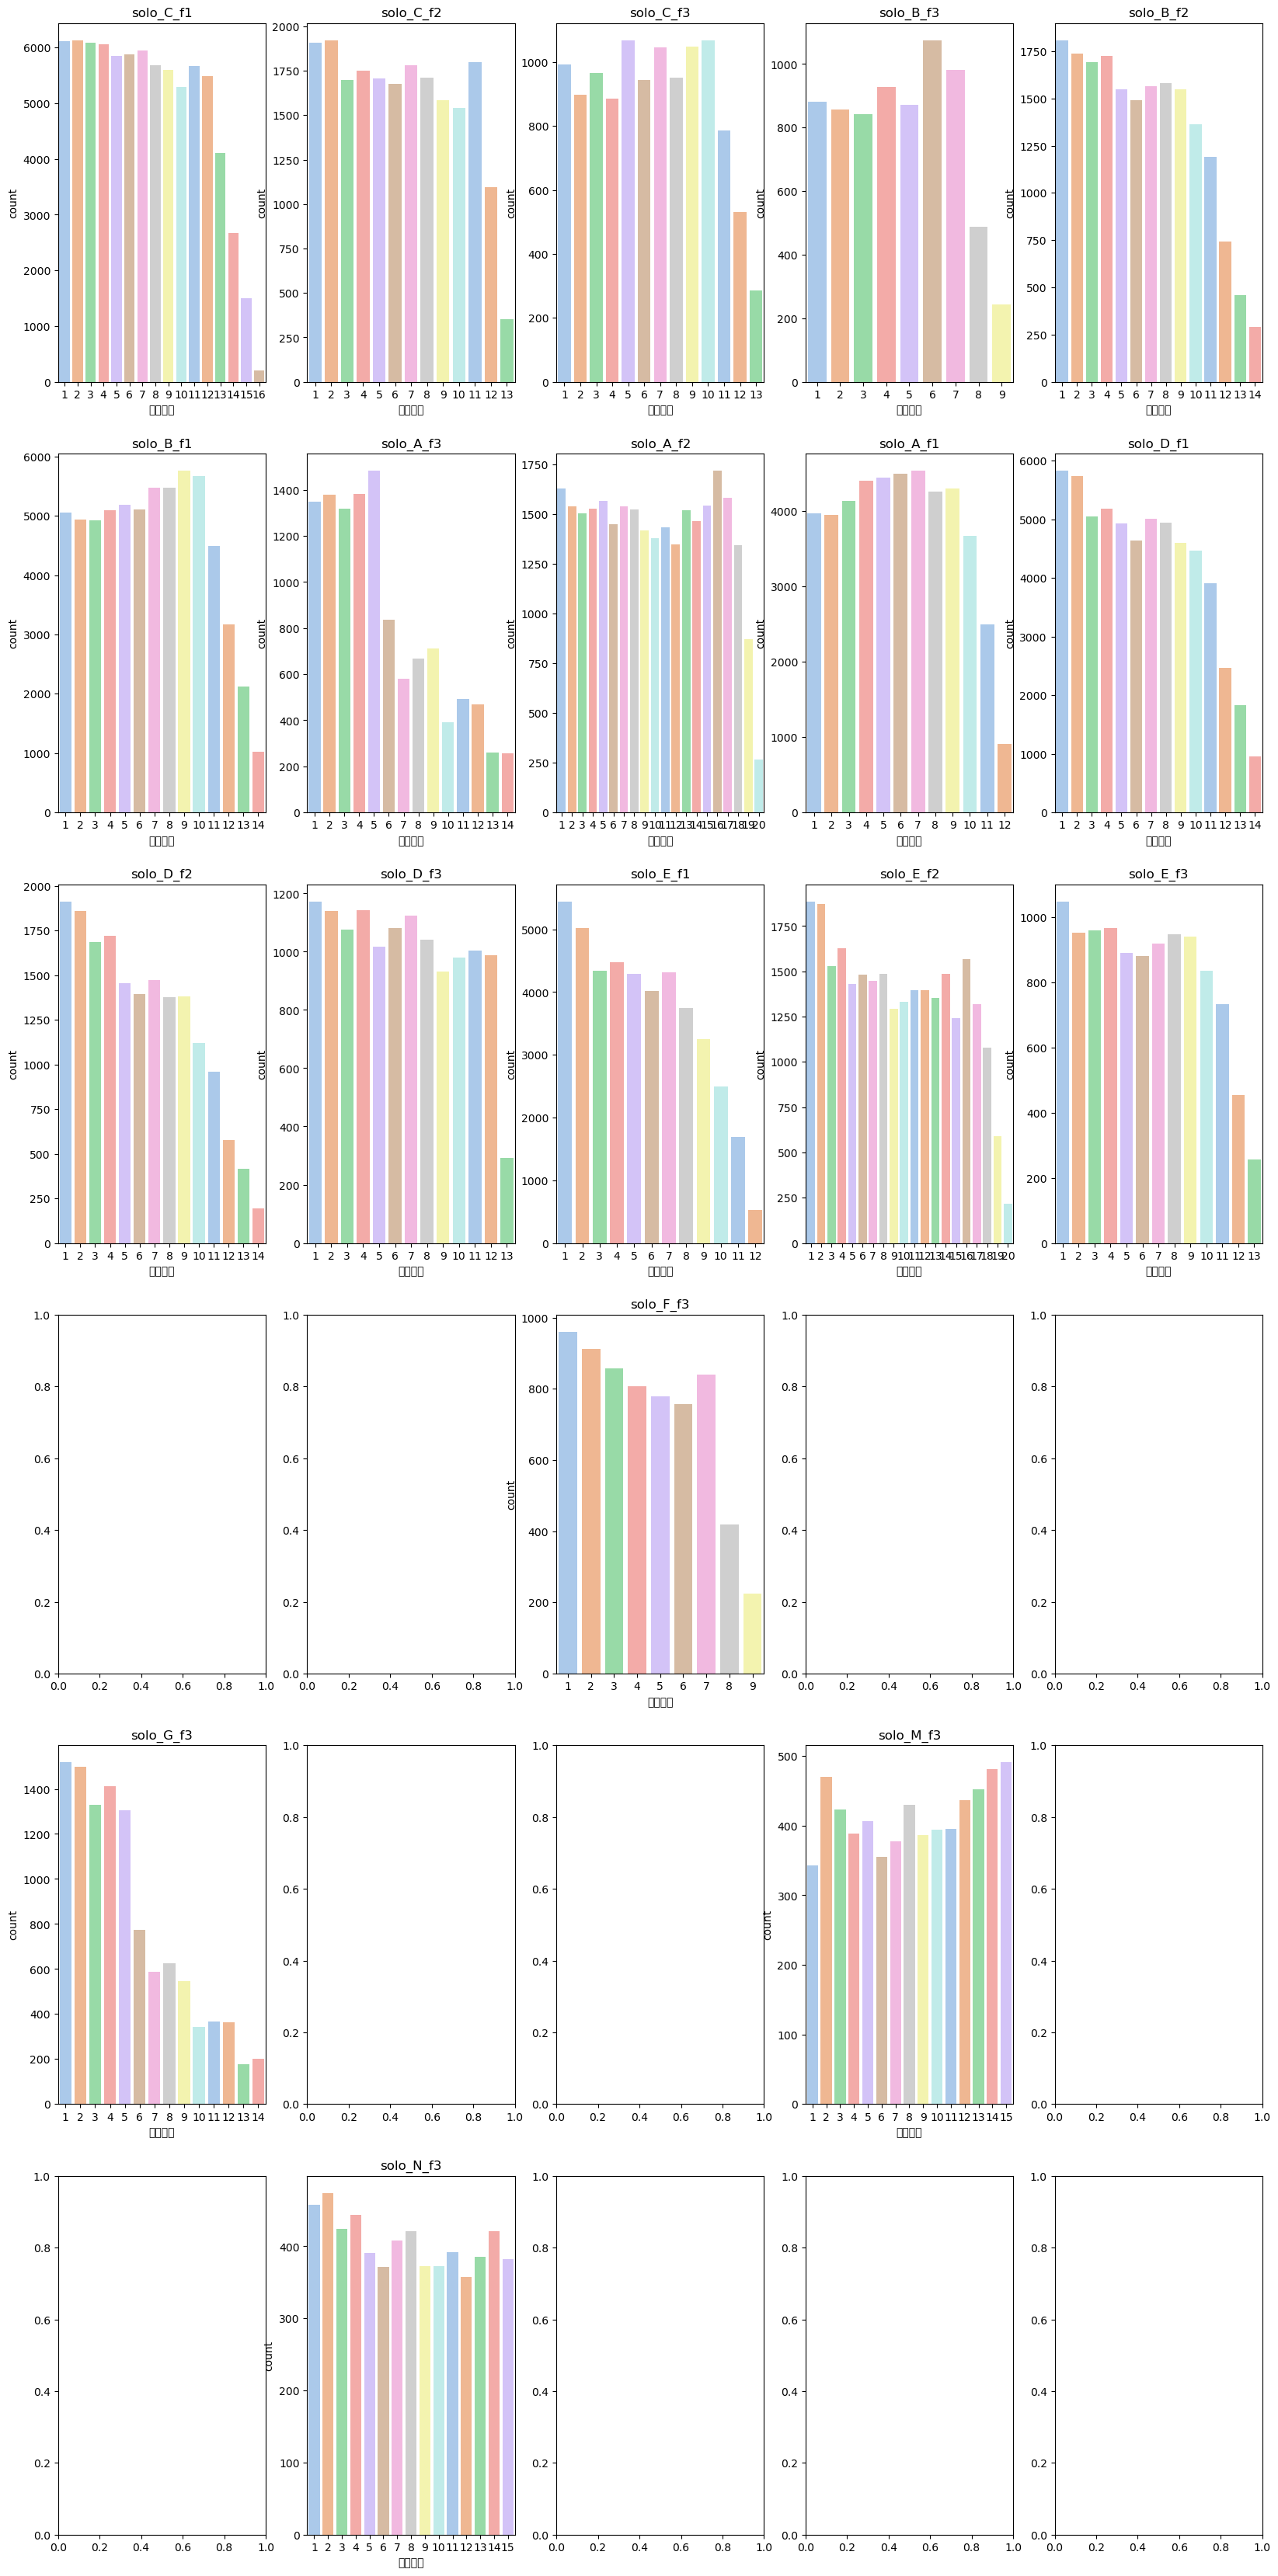

In [7]:
col_n = 5
row_n = 6

fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(20,row_n*7))
n = 0
for i in  range(len(datas)):
    if len(datas[i]) != 0:
        p = sns.countplot(x='자리번호',data=datas[i], ax=ax[int(n/col_n),int(n%col_n)],palette='pastel')
        p.set_title(datas_title[i])
    n+=1

# Mapping 
- 위 분포 시각화를 통해 콘서트홀 좌석배치표에 맵핑
- 해당 맵핑 결과를 기반으로 데이터 라벨링

### 1층 

- B 블럭

In [8]:
solo_B_f1['labels'] = 0

In [9]:
solo_B_f1['labels'] = solo_B_f1.apply(lambda row: 'S' if (row['열'] <= 5 )& (row['열'] >= 1) else row['labels'], axis=1)
solo_B_f1['labels'] = solo_B_f1.apply(lambda row: 'R' if (row['열'] > 5) & (row['열'] <= 12) else row['labels'], axis=1)
solo_B_f1['labels'] = solo_B_f1.apply(lambda row: 'S' if (row['열'] > 12) & (row['열'] <= 17) else row['labels'], axis=1)
solo_B_f1['labels'] = solo_B_f1.apply(lambda row: 'X' if (row['열'] > 17) & (row['열'] <= 20) else row['labels'], axis=1)
solo_B_f1['labels'] = solo_B_f1.apply(lambda row: 'A' if (row['열'] > 20) else row['labels'], axis=1)

- C 블럭

In [10]:
solo_C_f1['labels'] = 0

In [11]:
solo_C_f1['labels'] = solo_C_f1.apply(lambda row: 'S' if (row['열'] <= 5 )& (row['열'] >= 1) else row['labels'], axis=1)
solo_C_f1['labels'] = solo_C_f1.apply(lambda row: 'R' if (row['열'] > 5) & (row['열'] <= 12) else row['labels'], axis=1)
solo_C_f1['labels'] = solo_C_f1.apply(lambda row: 'S' if (row['열'] > 12) & (row['열'] <= 17) else row['labels'], axis=1)
solo_C_f1['labels'] = solo_C_f1.apply(lambda row: 'X' if (row['열'] > 17) & (row['열'] <= 20) else row['labels'], axis=1)
solo_C_f1['labels'] = solo_C_f1.apply(lambda row: 'A' if (row['열'] > 20) else row['labels'], axis=1)

- D 블럭

In [12]:
solo_D_f1['labels'] = 0

In [13]:
solo_D_f1['labels'] = solo_D_f1.apply(lambda row: 'S' if (row['열'] <= 5 )& (row['열'] >= 1) else row['labels'], axis=1)
solo_D_f1['labels'] = solo_D_f1.apply(lambda row: 'R' if (row['열'] > 5) & (row['열'] <= 12) else row['labels'], axis=1)
solo_D_f1['labels'] = solo_D_f1.apply(lambda row: 'S' if (row['열'] > 12) & (row['열'] <= 17) else row['labels'], axis=1)
solo_D_f1['labels'] = solo_D_f1.apply(lambda row: 'X' if (row['열'] > 17) & (row['열'] <= 20) else row['labels'], axis=1)
solo_D_f1['labels'] = solo_D_f1.apply(lambda row: 'A' if (row['열'] > 20) else row['labels'], axis=1)

- A 블럭

In [14]:
solo_A_f1['labels'] = 'B'
solo_A_f1['labels'] = solo_A_f1.apply(lambda row: 'A' if (row['자리번호'] >= 4) else row['labels'], axis=1)
solo_A_f1['labels'] = solo_A_f1.apply(lambda row: 'X' if (row['자리번호'] >= 6) else row['labels'], axis=1)
solo_A_f1['labels'] = solo_A_f1.apply(lambda row: 'S' if (row['자리번호'] >= 9) else row['labels'], axis=1)

- E 블럭

In [15]:
solo_E_f1['labels'] = 'B'
solo_E_f1['labels'] = solo_E_f1.apply(lambda row: 'S' if (row['자리번호'] >= 4) else row['labels'], axis=1)
solo_E_f1['labels'] = solo_E_f1.apply(lambda row: 'X' if (row['자리번호'] >= 6) else row['labels'], axis=1)
solo_E_f1['labels'] = solo_E_f1.apply(lambda row: 'A' if (row['자리번호'] >= 9) else row['labels'], axis=1)

### 2층 

- B,c,d 블럭 

In [16]:
solo_B_f2['labels'] = 'A'
solo_B_f2['labels'] = solo_B_f2.apply(lambda row: 'X' if (row['열'] <= 6) else row['labels'], axis=1)
solo_B_f2['labels'] = solo_B_f2.apply(lambda row: 'S' if (row['열'] == 3) else row['labels'], axis=1)
solo_B_f2['labels'] = solo_B_f2.apply(lambda row: 'R' if (row['열'] < 3) else row['labels'], axis=1)

In [17]:
solo_C_f2['labels'] = 'A'
solo_C_f2['labels'] = solo_C_f2.apply(lambda row: 'X' if (row['열'] <= 6) else row['labels'], axis=1)
solo_C_f2['labels'] = solo_C_f2.apply(lambda row: 'S' if (row['열'] == 3) else row['labels'], axis=1)
solo_C_f2['labels'] = solo_C_f2.apply(lambda row: 'R' if (row['열'] < 3) else row['labels'], axis=1)

In [18]:
solo_D_f2['labels'] = 'A'
solo_D_f2['labels'] = solo_D_f2.apply(lambda row: 'X' if (row['열'] <= 6) else row['labels'], axis=1)
solo_D_f2['labels'] = solo_D_f2.apply(lambda row: 'S' if (row['열'] == 3) else row['labels'], axis=1)
solo_D_f2['labels'] = solo_D_f2.apply(lambda row: 'R' if (row['열'] < 3) else row['labels'], axis=1)

- A 블럭

In [19]:
solo_A_f2['labels'] = 'B'
solo_A_f2['labels'] = solo_A_f2.apply(lambda row: 'A' if (row['열'] <= 6) else row['labels'], axis=1)
solo_A_f2['labels'] = solo_A_f2.apply(lambda row: 'X' if (row['열'] < 3) else row['labels'], axis=1)

- E 블럭

In [20]:
solo_E_f2['labels'] = 'B'
solo_E_f2['labels'] = solo_E_f2.apply(lambda row: 'A' if (row['열'] <= 6) else row['labels'], axis=1)
solo_E_f2['labels'] = solo_E_f2.apply(lambda row: 'X' if (row['열'] < 3) else row['labels'], axis=1)

### 3층 

- b,c,d,e,f 블럭

In [21]:
solo_B_f3['labels'] = 'C'
solo_B_f3['labels'] = solo_B_f3.apply(lambda row: 'B' if (row['열'] < 5) else row['labels'], axis=1)

In [22]:
solo_C_f3['labels'] = 'C'
solo_C_f3['labels'] = solo_C_f3.apply(lambda row: 'B' if (row['열'] < 5) else row['labels'], axis=1)

In [23]:
solo_D_f3['labels'] = 'C'
solo_D_f3['labels'] = solo_D_f3.apply(lambda row: 'B' if (row['열'] < 5) else row['labels'], axis=1)

In [24]:
solo_E_f3['labels'] = 'C'
solo_E_f3['labels'] = solo_E_f3.apply(lambda row: 'B' if (row['열'] < 5) else row['labels'], axis=1)

In [25]:
solo_F_f3['labels'] = 'C'
solo_F_f3['labels'] = solo_F_f3.apply(lambda row: 'B' if (row['열'] < 5) else row['labels'], axis=1)

- a, g 블럭

In [26]:
solo_A_f3['labels'] = 'Y'
solo_A_f3['labels'] = solo_A_f3.apply(lambda row: 'C' if (row['열'] <= 5) else row['labels'], axis=1)

In [27]:
solo_G_f3['labels'] = 'Y'
solo_G_f3['labels'] = solo_G_f3.apply(lambda row: 'C' if (row['열'] <= 5) else row['labels'], axis=1)

- m,n 블럭

In [28]:
solo_M_f3['labels'] = 'Y'
solo_N_f3['labels'] = 'Y'

# 데이터 concat

In [29]:
ddff = pd.concat([solo_A_f1,solo_A_f2])
ddff = pd.concat([ddff,solo_A_f3])
ddff = pd.concat([ddff,solo_B_f1])
ddff = pd.concat([ddff,solo_B_f2])
ddff = pd.concat([ddff,solo_B_f3])
ddff = pd.concat([ddff,solo_C_f1])
ddff = pd.concat([ddff,solo_C_f2])
ddff = pd.concat([ddff,solo_C_f3])
ddff = pd.concat([ddff,solo_D_f1])
ddff = pd.concat([ddff,solo_D_f2])
ddff = pd.concat([ddff,solo_D_f3])
ddff = pd.concat([ddff,solo_E_f1])
ddff = pd.concat([ddff,solo_E_f2])
ddff = pd.concat([ddff,solo_E_f3])
ddff = pd.concat([ddff,solo_F_f3])
ddff = pd.concat([ddff,solo_G_f3])
ddff = pd.concat([ddff,solo_M_f3])
ddff = pd.concat([ddff,solo_N_f3])

In [30]:
ddff.to_csv('data/교향곡_라벨_code4.csv')